In [ ]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

if not os.path.isfile( ".download/cifar10.tgz" ) : 
    dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
    download_url(dataset_url, './download/' )

    with tarfile.open( './download/cifar10.tgz', 'r:gz') as tar:
        tar.extractall( path='./data' )
pass

classes =  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
<class 'torchvision.datasets.folder.ImageFolder'> 50000


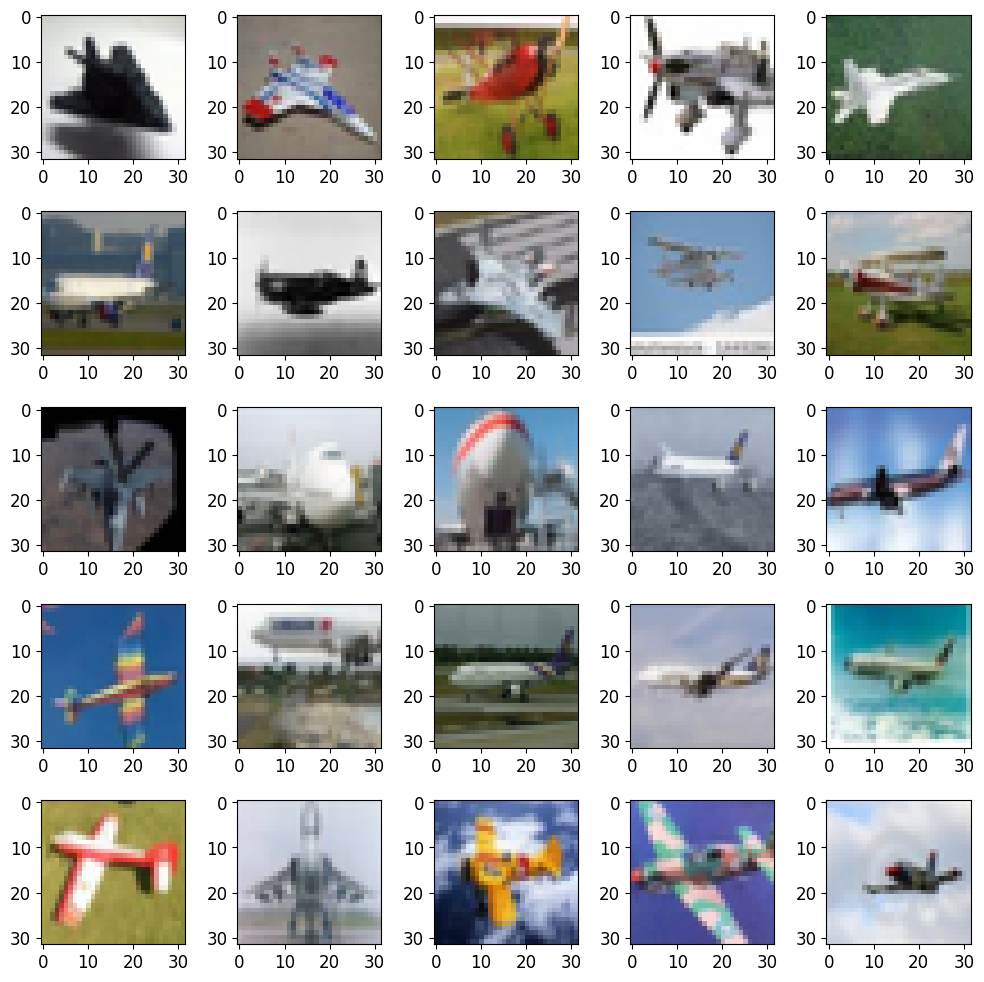

In [49]:
import matplotlib.pyplot as plt
import torch

from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

data_dir = './data/cifar10'
dataset = ImageFolder( data_dir + '/train', transform=ToTensor())
classes = dataset.classes

print( "classes = ", classes )

print( type( dataset ), len( dataset ) )

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = "12"
row_cnt = 5 ; col_cnt = 5
fig, charts = plt.subplots( row_cnt, col_cnt, figsize=( 2*col_cnt, 2*row_cnt) )
charts = charts.flatten() if row_cnt*col_cnt > 1 else [charts]

def show_example(idx, img, label):
    #print('Label: ', dataset.classes[label], "("+str(label)+")")
    klass = classes[ label ]
    size = img.size() 
    chart = charts[idx]
    chart.imshow( img.permute(1, 2, 0) )
    chart.set_xticks( torch.arange( 0, size[1] + 1, 10 ) )
    chart.set_yticks( torch.arange( 0, size[2] + 1, 10 ) )

for r in range( row_cnt ) :
    for c in range( col_cnt ) :
        idx = r*row_cnt + c
        show_example( idx , *dataset[idx] )
    pass
pass 

plt.tight_layout()
plt.show()

Label:  airplane (0)


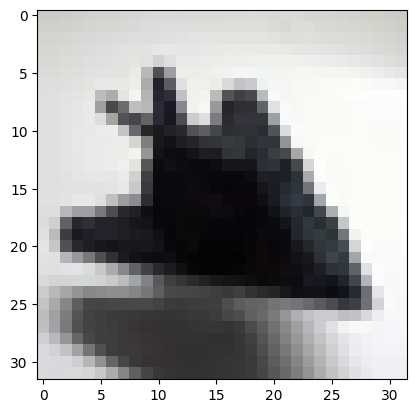

In [19]:
import matplotlib.pyplot as plt

plt.rcParams['figure.facecolor'] = '#ffffff'

def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow( img.permute(1, 2, 0) )

show_example(*dataset[0])